In [1]:
from matplotlib import pyplot
from scipy.stats import chi2
from numpy import arange

Estos son todos los cálculos que hay que hacer para obtener el $\beta$ 
o la potencia (su complemento). En nada se tiene en cuenta el resultado
muestral.

In [11]:
n = 500
alfa = 1 - 0.95
chi_alfa = chi2.ppf(1 - alfa, n - 1)
k = chi_alfa * 5 / (n - 1)
chi_beta = k * (n - 1) / 6
beta = chi2.cdf(chi_beta, n - 1)

Antes de mostrar los resultados generamos las probabilidades 
según la distribución $\chi^2$ para varianzas muestrales
provenientes de distribuciones normales con $\sigma^2 = 5$ 
y con $\sigma^2 = 6$

In [12]:
prob_acc = arange(0.001,1,0.001)
estadis = chi2.ppf(prob_acc, n - 1)
prob = chi2.pdf(estadis, n - 1)
s5 = estadis * 5 / (n - 1)
s6 = estadis * 6 / (n - 1)

Mostramos ahora la región crítica y su límite a izquierda $K$ según 
la significancia dada por $1 - \alpha$ y que tiene entonces una
probabilidad de error tipo I igual a $\alpha$ (superficie sombreada
bajo la curva de probabilidad de una varianza muestral proviniente
de una distribución normal con $\sigma^2 = 5$). Para calcular el 
error de tipo II es necesaria la hipótesis alternativa de que en
realidad la muestra proviene de una distribución cuyo $\sigma^2 = 6$
(superficie bajo la curva delimitada a derecha por $K$).

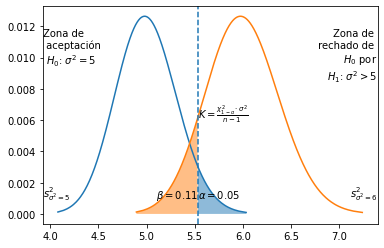

In [13]:
p = pyplot.subplot(111)
pyplot.plot(s5,prob)
pyplot.text(0,0.1,r'$s^2_{\sigma^2=5}$',va='bottom', transform=p.transAxes)
pyplot.fill_between(s5,prob, where=[x > chi_alfa * 5 / (n - 1) for x in s5], alpha=0.5)
pyplot.plot(s6,prob)
pyplot.text(1,0.1,r'$s^2_{\sigma^2=6}$',va='bottom', ha='right',transform=p.transAxes)
pyplot.fill_between(s6,prob, where=[x < chi_beta * 5 / (n - 1) for x in s5], alpha=0.5)
pyplot.axvline(k,ls='--')
pyplot.text(k,0.001, "$\\alpha = %.2f$" % alfa)
pyplot.text(k,0.001, "$\\beta = %.2f$" % beta, ha='right')
pyplot.text(k,chi2.pdf(chi_beta, n - 1),r'$K = \frac{\chi^2_{1-\alpha}\cdot\sigma^2}{n-1}$')
pyplot.text(0,0.9,"Zona de \n aceptación \n $H_0$: $\\sigma^2=5$",va='top',transform=p.transAxes)
pyplot.text(1,0.9,"Zona de \n rechado de \n $H_0$ por \n $H_1$: $\\sigma^2>5$",va='top', ha='right',transform=p.transAxes)
pyplot.show()

Como se ve, la única forma de aumentar la potencia del test 
(reduciendo en consecuencia $\beta$) para una hipótesis 
alternativa con $\sigma^2=6$ y mateniendo una significancia
de $1-\alpha$ es la de aumentar el tamaño de la muestra.
Pruebe con un $n=30$ y un $n=500$.